# A toy default risk model

In [2]:
#your name: Leo Widmer
#your student number: 02-728-020

## Dataset

In [3]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import roc_auc_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def evaluate(y_true, y_pred):
    # Area Under the curve.
    display("Area Under the curve", roc_auc_score(y_true, y_pred))
    display("confusion_matrix", confusion_matrix(y_true, y_pred))

"""
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(confusion_matrix(y_true, y_pred)), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
"""

'\n    class_names=[0,1] # name  of classes\n    fig, ax = plt.subplots()\n    tick_marks = np.arange(len(class_names))\n    plt.xticks(tick_marks, class_names)\n    plt.yticks(tick_marks, class_names)\n    # create heatmap\n    sns.heatmap(pd.DataFrame(confusion_matrix(y_true, y_pred)), annot=True, cmap="YlGnBu" ,fmt=\'g\')\n    ax.xaxis.set_label_position("top")\n    plt.tight_layout()\n    plt.title(\'Confusion matrix\', y=1.1)\n    plt.ylabel(\'Actual label\')\n    plt.xlabel(\'Predicted label\')\n'

In [4]:
import numpy as np

J = 80000
K = 20000
num_samples = J + K

# draw random numbers for every feature
rng = np.random.default_rng(seed=1988)
ages = rng.uniform(low=18., high=80., size=(num_samples, 1))               #age
incomes = rng.uniform(low=1., high=15., size=(num_samples, 1))                #income (thousands)
salaried = np.float32(rng.uniform(low=0., high=1., size=(num_samples, 1)) < .8)#self-employed or employed

X = np.concatenate([ages, incomes, salaried], axis=1)
print(X)

[[60.59241053 10.08316413  1.        ]
 [43.95739749  3.35935638  1.        ]
 [68.92716783  3.86839551  1.        ]
 ...
 [79.68831026  2.03178374  1.        ]
 [72.10994194  3.34547746  1.        ]
 [34.82558142 12.66588677  0.        ]]


In [5]:
agesMean = np.mean(ages[0:J])
incomesMean = np.mean(incomes[0:J])
salariedMean = np.mean(salaried[0:J])
print(agesMean)
print(incomesMean)
print(salariedMean)

48.98579649975508
7.981577067535557
0.802825


Two additional features which might be relevant for credit risk assessment in reality:
- Number of defaulted loans in the past: If a default happened before, it might be more likely to happen again
- Collateral available. If there is additional securities this might not decrease the risk itself of default, but it is relevant for the overall risk assessment as the bank might be able to recover some assets in case of default.

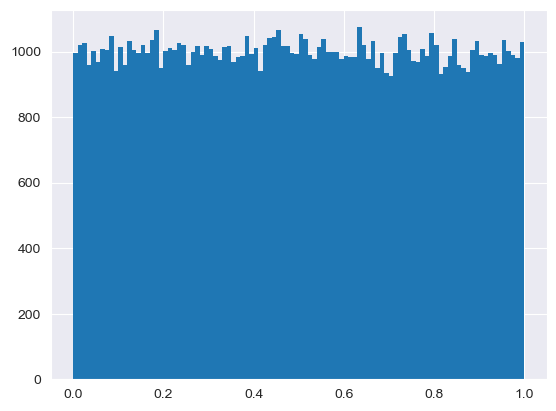

In [6]:
xi = rng.uniform(low=0, high=1, size=(num_samples,1))
# Historgram of Xi
import matplotlib.pyplot as plt
counts, bins = np.histogram(xi, 100)
plt.stairs(counts, bins, fill=True)

In [7]:
def sigmoid(z):
    return 1 / (1+np.exp(-z))

In [8]:
def p(x,a0,a1,a2,a3):
    return sigmoid(a0 + a1 * abs(x[:,[0]] - 50) + a2 * pow(x[:,[1]],1.25) + a3 * x[:,[2]])

/var/folders/vr/3sfxww610gv8_lr9hlbfzryr0000gr/T/ipykernel_22510/2231803179.py:9: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  counts, bins = np.histogram(groundTruth, 2)


factor of defaults: [0.05106]


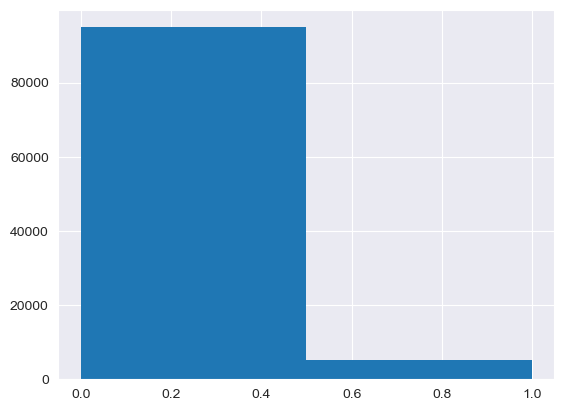

In [9]:
# a non-linear data set of credit defaults
a_0 = 0.3
a_1 = -5
a_2 = 0.8
a_3 = -5

p_1 = p(X,a_0,a_1,a_2,a_3)
groundTruth = xi < p_1
counts, bins = np.histogram(groundTruth, 2)
plt.stairs(counts, bins, fill=True)
# check if we have around 5% defaults on the whole dataset in for each model
print('factor of defaults: ' + str(sum(groundTruth)/num_samples))

In [10]:
# divide dataset into train- and test
X_train_1 = X[:J, :]
X_test_1 = X[J:, :]
y_train_1 = groundTruth[:J]
y_test_1 = groundTruth[J:]
#print("X_train_1.shape: " + str(X_train_1.shape))

## Logistic regression

In [11]:
from sklearn.linear_model import LogisticRegression

#logistic regression for the dataset
model_LR_1 = LogisticRegression().fit(X_train_1, y_train_1)

#a look at the coefficients
print(model_LR_1.coef_)
print(model_LR_1.intercept_)

[[ 0.00341441  0.2351839  -0.50938069]]
[-4.94806477]


/Users/lw/.conda/envs/Colab Notebooks/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### ROC curves for the logistic regression

total deviance for training data = 0.18399257945167807
total deviance for test data = 0.17804599502348598


'Area Under the curve'

0.5406146640981999

'confusion_matrix'

array([[18114,   897],
       [  862,   127]])

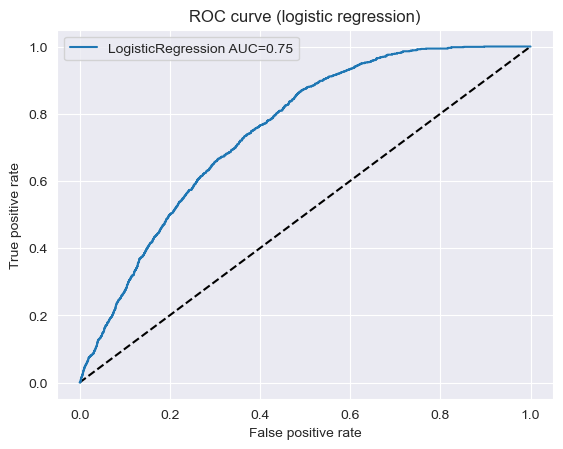

In [12]:
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, log_loss

#calculate the scores on the linear testset
scores_LR_1_train = model_LR_1.predict_proba(X_train_1)
scores_LR_1 = model_LR_1.predict_proba(X_test_1)
#calculate fpr and tpr
fpr_LR_1, tpr_LR_1, thresholds_LR_1 = metrics.roc_curve(y_test_1, scores_LR_1[:, 1], pos_label=1)
#calculate auc
auc_LR_1 = roc_auc_score(y_test_1, scores_LR_1[:, 1])
#calculate total deviance for training and test data. 
#Note that scores_LR_1_train[:, 1] is the predicted default probability
print('total deviance for training data = ' + str(log_loss(y_train_1, scores_LR_1_train[:, 1])))
print('total deviance for test data = ' + str(log_loss(y_test_1, scores_LR_1[:, 1])))

#plot the roc curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_LR_1, tpr_LR_1, label='LogisticRegression AUC={:.2f}'.format(auc_LR_1))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (logistic regression)')
plt.legend(loc='best')

#print(y_test_1.shape)
#print(xi[J:, 0].shape)
#print(scores_LR_1[:, 1].shape)
y_pred1 = xi[J:, 0] <= scores_LR_1[:, 1]
evaluate(y_test_1.ravel(), y_pred1)


In [40]:
CountBetween3and4percent = 0
CountBetween3and4percentANDy1 = 0
for i in range(0, K):
    score = scores_LR_1[i,1]
    if 0.03 <= score <= 0.04:
        CountBetween3and4percent += 1
        if xi[i] <= score:
            CountBetween3and4percentANDy1 += 1

print(CountBetween3and4percent)
print(CountBetween3and4percentANDy1)
print('Fraction of test data vectors with default probability between 3% and 4% and y=1: ' + str(CountBetween3and4percentANDy1/CountBetween3and4percent))


1726
60
Fraction of vectors with default probability between 3% and 4% and y=1: 0.03476245654692932


## Neural networks

In [15]:
#the loss function
def total_deviance(y_true, y_pred):
    return tf.math.reduce_mean(-y_true * tf.math.log(y_pred) - (1. - y_true) * tf.math.log(1. - y_pred))

In [16]:
import tensorflow as tf
from tensorflow import keras 

#build the nn model with 2 hidden layers
model_NN = keras.Sequential(
    [
     keras.layers.BatchNormalization(),
     keras.layers.Dense(64, activation='relu', name="hidden_layer_1"),
     keras.layers.Dense(32, activation='relu', name="hidden_layer_2"),
     keras.layers.Dense(32, activation='relu', name="hidden_layer_3"),
     keras.layers.Dense(1, activation='sigmoid', name="output_layer")
    ]
)

#pick an optimizer
model_NN.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss=total_deviance
)

#shuffle the data during training
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_1, np.float32(y_train_1)))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(512)

#fit the model
model_NN.fit(
    train_dataset,
    batch_size=512,
    epochs=7
)


Epoch 1/7
157/157 [==============================] - 1s 3ms/step - loss: 0.2318
Epoch 2/7
157/157 [==============================] - 0s 3ms/step - loss: 0.0836
Epoch 3/7
157/157 [==============================] - 0s 3ms/step - loss: 0.0455
Epoch 4/7
157/157 [==============================] - 1s 3ms/step - loss: 0.0404
Epoch 5/7
157/157 [==============================] - 1s 3ms/step - loss: 0.0375
Epoch 6/7
157/157 [==============================] - 0s 3ms/step - loss: 0.0428
Epoch 7/7
157/157 [==============================] - 0s 3ms/step - loss: 0.0407


### Roc curves for the neural network

total deviance for training data = 0.02615991724967569
total deviance for test data = 0.026396675269673268


'Area Under the curve'

0.9488945227229683

'confusion_matrix'

array([[18894,   117],
       [   95,   894]])

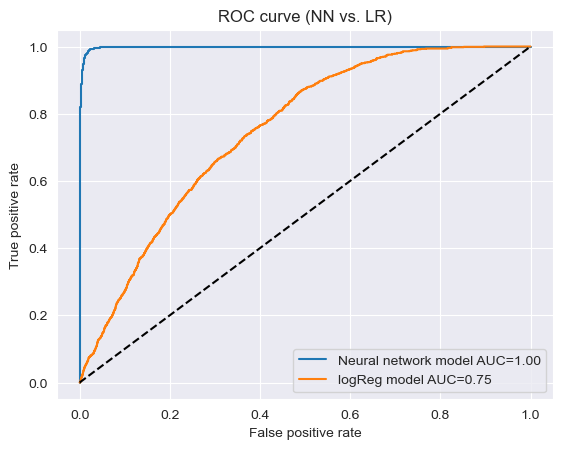

In [42]:
#calculate the scores on the testdata
scores_NN_train = model_NN(X_train_1)
scores_NN = model_NN(X_test_1)
fpr_NN, tpr_NN, thresholds_NN = metrics.roc_curve(y_test_1, scores_NN[:, 0], pos_label=1)
auc_NN = roc_auc_score(y_test_1, scores_NN[:, 0])

#calculate total deviance for training and test data.
#Note that scores_NN[:, 0] is the predicted default probability.
print('total deviance for training data = ' + str(log_loss(y_train_1, scores_NN_train[:, 0])))
print('total deviance for test data = ' + str(log_loss(y_test_1, scores_NN[:, 0])))


plt.plot(fpr_NN, tpr_NN, label='Neural network model AUC={:.2f}'.format(auc_NN))
plt.plot(fpr_LR_1, tpr_LR_1, label='logReg model AUC={:.2f}'.format(auc_LR_1))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (NN vs. LR)')
plt.legend(loc='best')

evaluate(y_test_1, xi[J:, 0] <= scores_NN[:, 0] )

In [41]:

CountBetween3and4percent = 0
CountBetween3and4percentANDy1 = 0
for i in range(0, K):
    score = scores_NN[i, 0]
    if 0.03 <= score <= 0.04:
        CountBetween3and4percent += 1
        if xi[i] <= score:
            CountBetween3and4percentANDy1 += 1

print(CountBetween3and4percent)
print(CountBetween3and4percentANDy1)
print('Fraction of test data vectors with default probability between 3% and 4% and y=1: ' + str(
    CountBetween3and4percentANDy1 / CountBetween3and4percent))

111
6
Fraction of test data vectors with default probability between 3% and 4% and y=1: 0.05405405405405406


## P&L Analysis

Mean: 3958.09
VaR: 16180.00
Mean (LR): 2688.40
VaR (LR): 9050.00
Mean (NN): 37481.21
VaR (NN): -30880.00


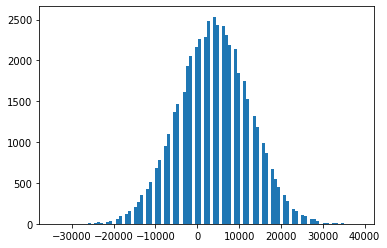

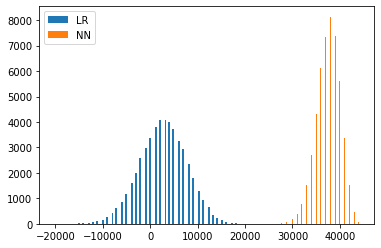

In [33]:
from scipy.stats import norm
import matplotlib as mpl

portfolio_size = 5000
loan_amount = 1000. 
rate = 0.055

#simulate the defaults on the loan portfolio
defaults = np.float32(np.random.uniform(low=0., high=1., size=(portfolio_size, 50000)) < p_2_test[:portfolio_size, :])


#p&l for scenario 1
p_and_l_a = np.sum(loan_amount * (rate * (1. - defaults) - defaults), axis=0)

#histogramm for scenario 1
plt.figure(1)
plt.hist(p_and_l_a, bins=100)

print('Mean: {:.2f}'.format(np.mean(p_and_l_a)))
p_and_l_a = np.sort(p_and_l_a)
print('VaR: {:.2f}'.format(-p_and_l_a[499]))

#scenario 2

rate = 0.01

p_and_l_b_LR = np.sum(loan_amount * (rate * (1. - defaults) - defaults) * np.float32(scores_LR_2[:portfolio_size, 1:2] < 0.05), axis=0)
p_and_l_b_NN = np.sum(loan_amount * (rate * (1. - defaults) - defaults) * np.float32(scores_NN[:portfolio_size, :] < 0.05), axis=0)


plt.figure(2)
plt.hist(p_and_l_b_LR, bins=100, label='LR')
plt.hist(p_and_l_b_NN, bins=100, label='NN')
plt.legend()


print('Mean (LR): {:.2f}'.format(np.mean(p_and_l_b_LR)))
p_and_l_b_LR = np.sort(p_and_l_b_LR)
print('VaR (LR): {:.2f}'.format(-p_and_l_b_LR[499]))

print('Mean (NN): {:.2f}'.format(np.mean(p_and_l_b_NN)))
p_and_l_b_NN = np.sort(p_and_l_b_NN)
print('VaR (NN): {:.2f}'.format(-p_and_l_b_NN[499]))

